# Исследование продажи игр

Имея в своем распоряжении датасет, со всеми необходимыми для анализа данными проведем свое исследование по стандартому шаблону.
-Для начала импортируем необходиые библиотеки. \
-Ознакомимся с данными в датасете, что бы составить первое представление о его составе и необходимой предобработке данных. \
-Проведем необходимую предобработку данных. \
-Проанализируем и визуализируем все имеющиеся зависимости. \
-Проведем некоторые вычисления, способные рассказать нам больше о важнейших скрытых закономерностях и особенностях предмета исследования. \
-Подведем итоги. \
P.S. перед нами стоит задача аналитического типа - это накладывает небольшие ограничения, особенно в части предобработки данных.\
Опишем данные, которые имеем.\
Имеется дата-фрейм на 16715 строк и 11 столбцов.\
Столбцы характеризуют такие данные как: название игры, платформа игры, год релиза (без указания месяца и дня), жанр игры, продажи по регионам (Североамериканский, Европейский, Японский и "другий" регионы), оценки пользователей, оценки критиков, и возрастной рейтинг (согласно агенству ESRB (англ. Entertainment Software Rating Board).\
Стоит обратить внимание на систему возрастного рейтинга, в разрезе рынков, на которых выходила та или иная игра. Возможно, агенство не присваивало рейтинг играм не предназначеным для Североамериканского региона.\
Так же можем предположить некоторое кол-во пропусков в оценках, как пользовательских, так и критиков.

## Импортируем необходимые библиотеки, открываем файл и составляем первое представление.

### Для начала, импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### Читаем csv, используя оба источника на случай технических неисправностей.
Сохраняем файл в стандартную переменную.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Ознакамливаемся с данными и сразу же выводим основные характеристики csv файла.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Для наглядности исходных данных выведем гистограммы столбцов датафрейма.

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

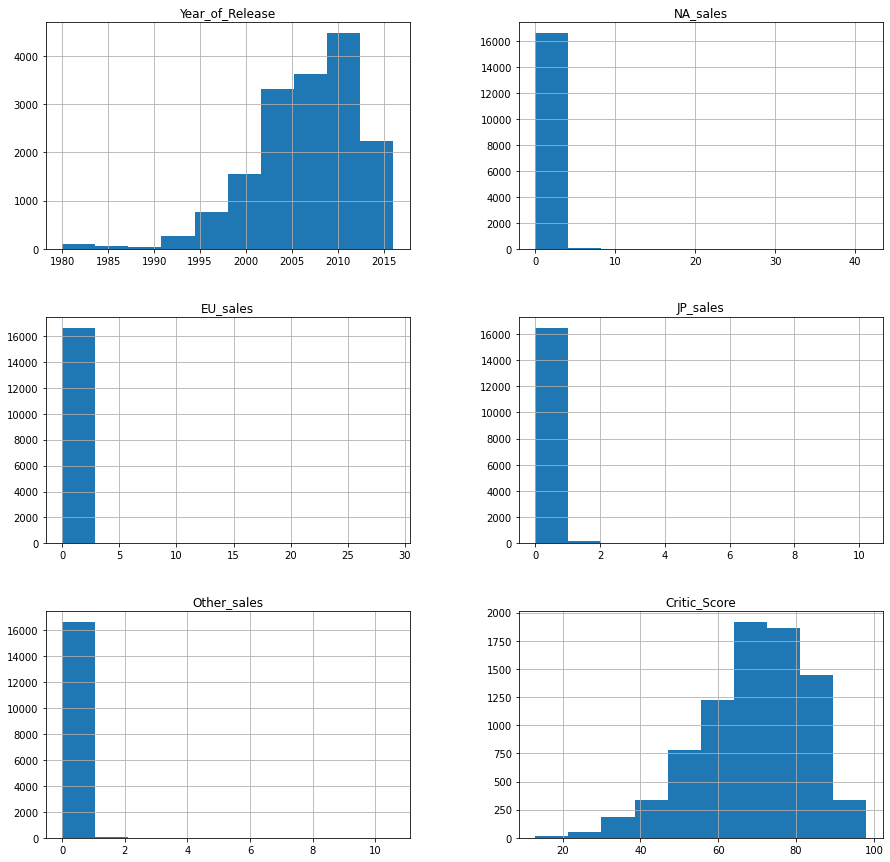

In [6]:
data.hist(figsize=(15, 15))

Гистограммы исходных (не предобработанных) значений указывают на наличие пропусков, неточностей и выбросов (случайных значений).
Потребуется провести предобработку данных.

P.S. Так как перед нами стоит задача аналитического типа, нецелесообразно избавляться от пропусков и выбросов любой ценой (ценой сильного искажения данных). В любом случае, далее мы будем по-возможности использовать методы, устойчивые к подобным аномалиям.

##  Предобработка данных

### Начнем предобратотку данных с корректировки названий столбцов согласно "правилам хорошего тона". 
Понадобится всего-лишь заменить заглавные быквы строчными, выполним это одной строкой.

In [7]:
data.columns.unique()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
data.columns = data.columns.str.lower()

### Проверяем новые названия столбцов.

In [9]:
data.columns.unique()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Приводим столбцы, содержащие названия к нижнему регистру. 
Так как у нас всего 4 столбца содержат названия, приведем их поочередно, используя встроенный метод Pandas для экономии времени вычислений.

In [10]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data['platform'] = data['platform'].str.lower()
data['rating'] = data['rating'].str.lower()

### Теперь, когда все приведено к нижнему регистру, можем избавиться от полных дубликатов.

In [11]:
data.duplicated().sum()

0

Полных дубликатов не обнаружено, следуем дальше.

### Для выполнения дальнейших вычислений требуется привести столбцы датафрейма к нужным форматам согласно их значениям. 
Это поможет сэкономить память, ускорить вычисления и сделать их точнее.

Далее, для избежания нагромождения ненужного кода были приведены только операции над конкретными столбцами. \
При этом все столбцы были проверены на уникальные значения, аномалий не было обнаружено. (код проверок не отображен за неимением смысла и лишнего нагромождения).

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Столбец **critic_score** Приводим в целочисленный формат, так как его значения фактически не содержат дробной части.

In [13]:
data['critic_score'] = data['critic_score'].astype('Int64')

Столбец **user_score** умножим на 10 для удобста возможного сравнения со столбцом **critic_score**, заблаговременно переведя его в формат float. \
P.S. Наблюдаем большое кол-во неизвестного значения "tbd", заменим его на пропуск, так как оно может помешать при дальнейших вычислениях.

In [14]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

In [15]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data['user_score'] = data['user_score'] * 10
data['user_score'] = data['user_score'].astype('Int64')

### Переходим к заполнению пропусков.
В разных регионах присвоением рейтинга занимаются разные агенства, например: ESRB, PEGI, SARO.\
В связи с чем, если игра не выходила на северо-американский рынок, то рейтинг у нее в данном дата-сете отсутсвует.\
Предлагается заменить пропуски в рейтинге на 'out of rating', в оценках на '-1'.\
Значения '-1' было выбрано таковым, что б соответствовать формату столбца и наоборот, а также не оказывать слишком большого влияния на вычисления.

In [16]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['rating'] = data['rating'].fillna('out of rating')

Удалим пропуски в столбцах **name** и **genre**.\
Так как пропусков в этих столбцах всего по 2 шт, мы ,практически, не потеряем с точки зрения выборки.

In [17]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

### Проверяем выполнение предыдущих шагов.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int64  
 9   user_score       16713 non-null  Int64  
 10  rating           16713 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи и запишем их в отдельный столбец.

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [20]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1,out of rating,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-1,out of rating,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-1,out of rating,28.31


### Итак, мы провели необходимую предобработку данных.
- Привели названия столбцов к "правилам хорошего тона".
- Проверили дата-сет на дубликаты.
- Изменили формат столбцов там, где это возможно.
- Заменили пропуски на числовые/строчные значения соответственно другим данным в этих столбцах для дальнейшего исследования.
- Добавили столбец с кол-вом продаж во всех регионах суммарно.\
Стоит отметить, что пропуски в столбце даты релиза мы оставили как есть, так как им невозможно предложить замену.

## Исследовательский анализ данных ( EDA )

### Группировка игр согласно годам релиза.

In [21]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

,total_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для наглядности построим гистограмму выпуска игр по годам.

Text(0, 0.5, 'количество игр')

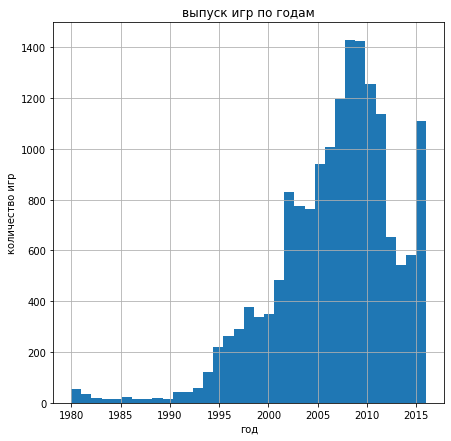

In [22]:
data.hist('year_of_release',bins=35, figsize=(7,7))
plt.title('выпуск игр по годам')
plt.xlabel('год')
plt.ylabel('количество игр')

Появились в 80-ых, но до 95 года наблюдаем плато — видимо мощностей не хватало. С 95-года график релизов рос, видимо, мощность чипов видеоадаптеров резко увеличилась, начали появляться игры с более развитой графикой. Наблюдаем резкий рост кол-ва выпускаемых игр в 1997, 2002, 2004, 2011 годах.\
В целом можно резюмировать: кол-во выпускаемых игр резко возрасло в с 1995 года, затем произошел резкий спад 2011 году. Возможно произошло насыщение рынка.\
Так как рынок игр очень динамичен, в исследовании нам важнее всего период за последние 2 года.

### Проанализируем как менялись продажи по платформам

In [23]:
data.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
    by='total_sales', ascending=False
).head(10)

,platform,total_sales
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51
4,ds,806.12
15,ps,730.86
6,gba,317.85
18,ps4,314.14
19,psp,294.05
13,pc,259.52


In [24]:
top5_sales_platforms = (data.groupby('platform')
 .total_sales.sum()
 .sort_values(ascending=False)
 .head())
top5_sales_platforms

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
Name: total_sales, dtype: float64

Text(0, 0.5, 'продажи')

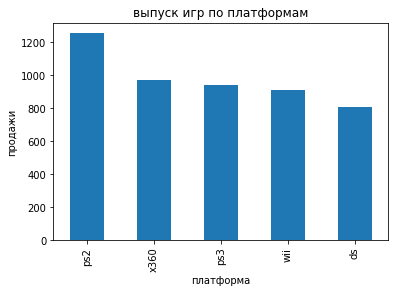

In [25]:
top5_sales_platforms.plot(kind='bar')
plt.title('выпуск игр по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')

### Построим распределение по годам продаж на каждой из 5 наиболее продаваемых платформ.

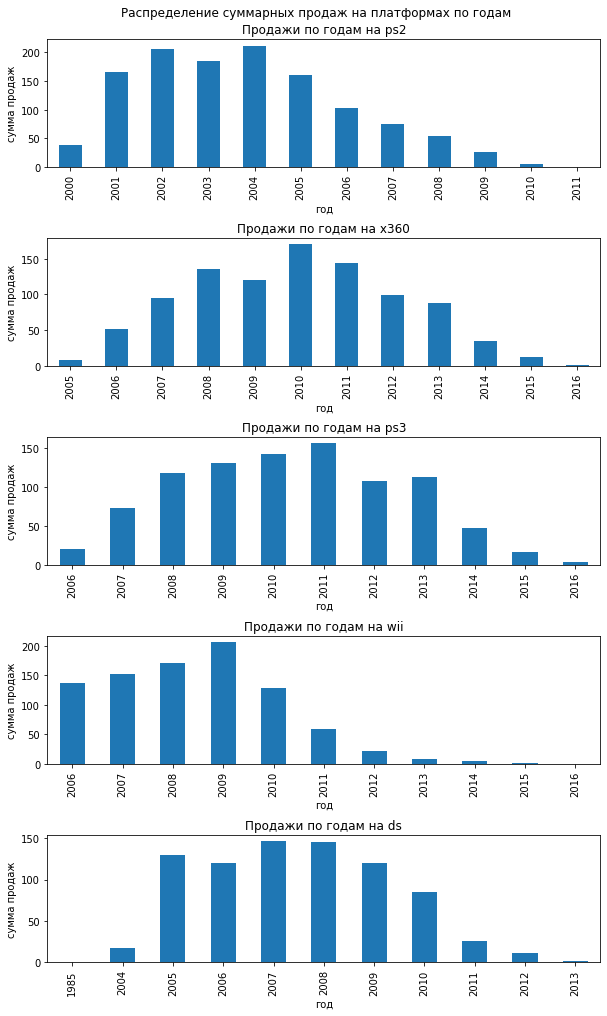

In [26]:
fig, axs = plt.subplots(len(top5_sales_platforms))
fig.set_size_inches(9.5, 14.5)
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение суммарных продаж на платформах по годам')


for i, platform in enumerate(top5_sales_platforms.index):
    plt.sca(axs[i])
    data[data.platform==platform].groupby('year_of_release').total_sales.sum().plot(kind='bar');
    plt.title(f'Продажи по годам на {platform}')
    plt.ylabel('сумма продаж')
    plt.xlabel('год')

Можно заметить, что новые платформы появляются и исчезают старые примерно за 2-3 года. 1 года на пике и по 1 на взлет/падение. \
В дальнейшем исследовании будет использован период в 3 года. \
С одной стороны это позволит нам захватить больше данных (чем за 2 года), при этом результат все еще не потеряет актуальность и не захватит отживжие тренды на таком динамичном рынке, как игровая индустрия. \
Так же отметим, что дальнейшее исследование будет касаться по-большей части консолей. \
Рынок ПК гейминга живет немного по своим (другим) законам.

<div class="alert alert-info">
<b>Средний срок жизни платформ составляет ориентировочно 8 лет (это заметно по циклам роста-падения). Однако как и было сказано ранее пик популярности составляет в среднем от 2 до 4 лет, остальное время платформа либо еще не популярна, либо уже не популярна, соответственно продажи - невысоки (но имеют распределение близкое к "нормальному"). Было решено взять период в 3 года ( среднее между 2 и 4). Так как индустрия игр очень динамична, а строить прогноз на следующий год по 5-8 летним данным не корректно, к тому же после 4-х лет начинается спад продаж. Едва-ли планировать торговую стратегию по таким данным - корректно</b> 
</div>

### Сделаем срез данных ( новый датафрейм) с данными только за интересующий нас период времени.

In [27]:
actual_data = data[data.year_of_release >= 2014]

Построим график и сгруппированными данными, что бы определить какая платформа окажется в лидерах.

Text(0, 0.5, 'саммарные продажи')

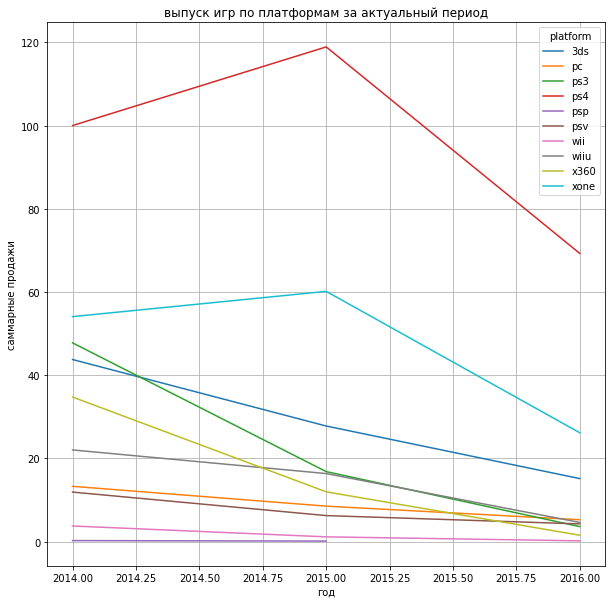

In [28]:
data_sales = actual_data.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).plot(figsize=(10,10), grid=True)
plt.title('выпуск игр по платформам за актуальный период')
plt.xlabel('год')
plt.ylabel('саммарные продажи')

Итак, самыми потенциально прибыльными платформами могли бы быть Sony PlayStation 4 (с отрывом в 2 раза) и Xbox One от Microsoft. \
На 2-м месте актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3. \
Тут напрашивается интересный промежуточный вывод: Мы наблюдаем на графике спад абсолютно всех платформ.(в разной степени).\
К тому же, все эти платформы существуют уже какое-то время до 2014 (период на котором мы проводим исследование). \
Тут можно предположить одно из двух: либо грядет смена поколений, либо произошло насыщение рынка. \
В любом случае, это требует дополнительного исследования, в том числе и на тему "ожидается ли в 2017 году рост рынка?"

<div class="alert alert-info">
<b>На графике шаг оси Х - 0,25 года, что соответствует 3 месяцам - Квартал. На мой взгляд это удобно для экономистов. Видны подробные изменения объема продаж на начало и конец квартала )) Добавил сетку для большей наглядности и названия (графика и осей)</b> 
</div>

### Анализ продаж перспективных платформ. 
Итак, мы определили, что перспективными платформами являются PS4, PS3, XOne, X360, WiiU и 3DS, а актуальный период исследования - 3 года, т.е. 2014-2016 годы.

### Для наглядности построим диаграмм размаха (ящик с усами) по актуальным данным.

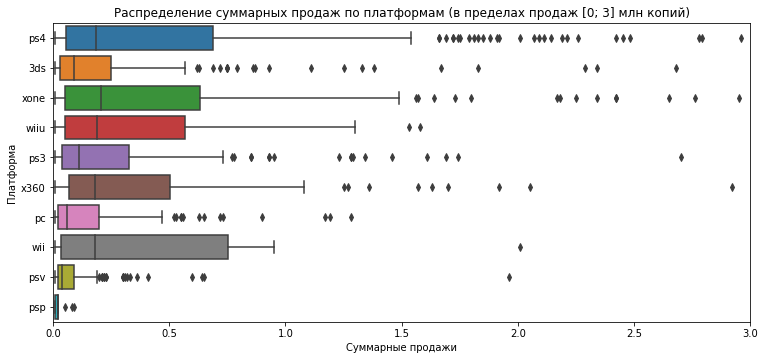

In [29]:
fig = plt.figure()
fig.set_size_inches(12.5, 5.5)
sns.boxplot(y=actual_data.platform, x=actual_data.total_sales)
plt.xlim(0,3)
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа')
plt.title('Распределение суммарных продаж по платформам (в пределах продаж [0; 3] млн копий)');

Наблюдаемый нами результат достаточно очевиден. Как и любые ценовые распределения - распределение суммарных продаж имеет ярко выраженное нормальное распределение, смещенное вправо (так как отрицательных значений у продаж быть не может). Основную кассу платформам приносят несколько популярных игр. Остальные же игры (основная масса) находятся в районе нулевых продаж. То есть платформа по сути выживает за счет бестселлеров. Остальные игры не более чем статистика для платформы. Может быть и вообще срок жизни игровой консоли обуславливается пропаданием интереса к бестселлерам.

### Построим диаграмму рассеяния где покажем зависимость продаж внутри платформы ps4 от оценок пользователей и критиков.
Взяли 'ps4' для примера в качестве одной из самых перспективных.\
Пробовал взять для примера wii, но там не информативный график ((

Text(0, 0.5, 'Суммарные продажи')

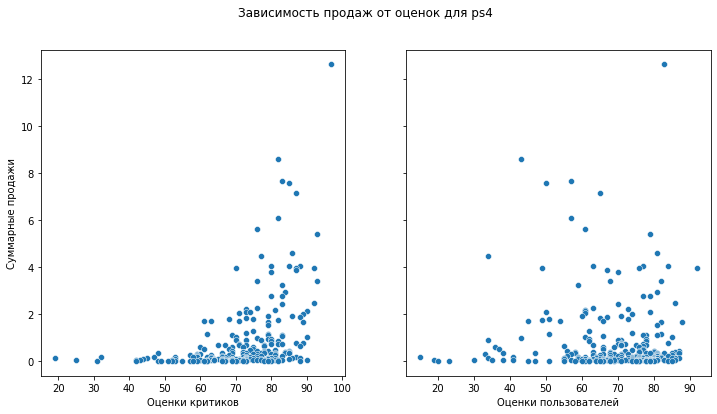

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(12, 6)
fig.suptitle('Зависимость продаж от оценок для ps4')
sns.scatterplot(data=actual_data.query('platform == "ps4" and critic_score != -1'), x='critic_score', y='total_sales', ax=ax1)
sns.scatterplot(data=actual_data.query('platform == "ps4" and user_score != -1'), x='user_score', y='total_sales', ax=ax2)
ax1.set_xlabel('Оценки критиков')
ax2.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Суммарные продажи')

Зависимость имеет смысл смотреть на графиках, в правой части. Чем выше оценка тем больше продаж. Но только после определенного значения но до этого значения (в районе 40 у критиков и 55 y пользователей) все продажи около нуля.
Методы для расчета корреляции (например коэфф корелляции Пирсона) нам не подходят.

### Что бы соотнести наш предыдущий вывод с др платформами, построим и для них диаграммы рассеивания.

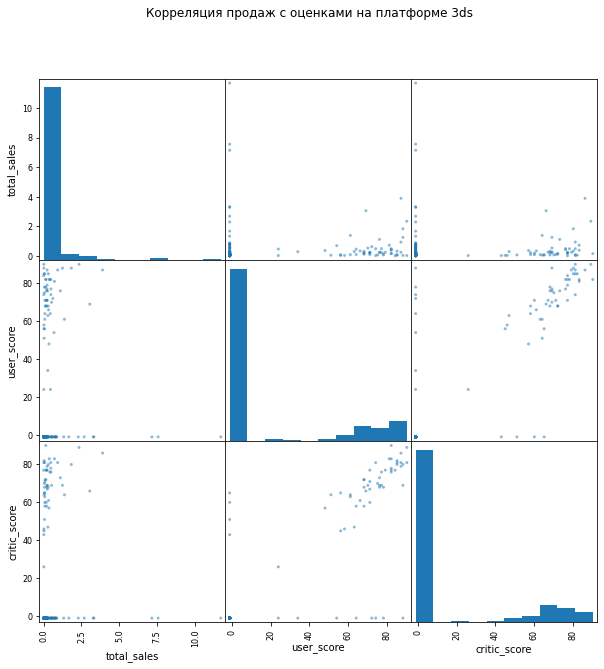

,total_sales,user_score,critic_score
total_sales,1.000000,0.054741,0.052992
user_score,0.054741,1.000000,0.887159
critic_score,0.052992,0.887159,1.000000


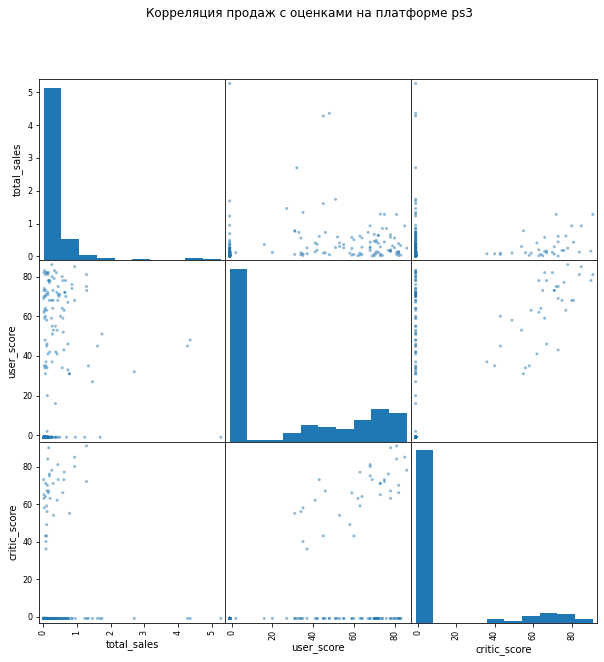

,total_sales,user_score,critic_score
total_sales,1.000000,0.197946,0.023612
user_score,0.197946,1.000000,0.517911
critic_score,0.023612,0.517911,1.000000


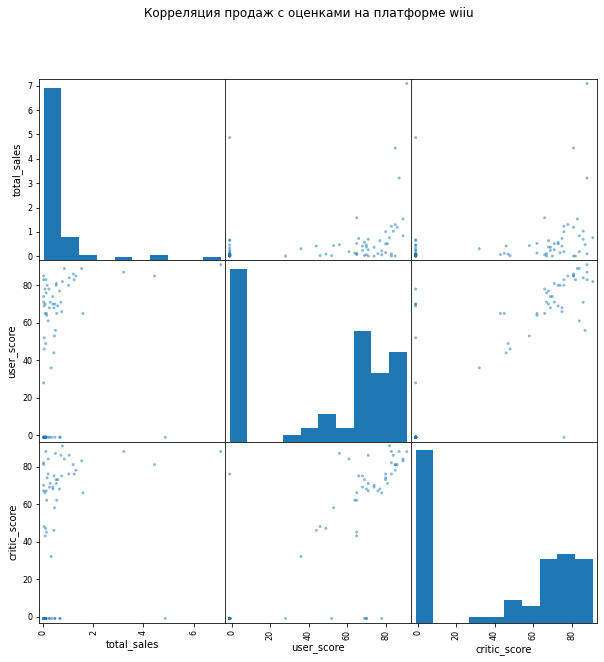

,total_sales,user_score,critic_score
total_sales,1.000000,0.263433,0.291296
user_score,0.263433,1.000000,0.831522
critic_score,0.291296,0.831522,1.000000


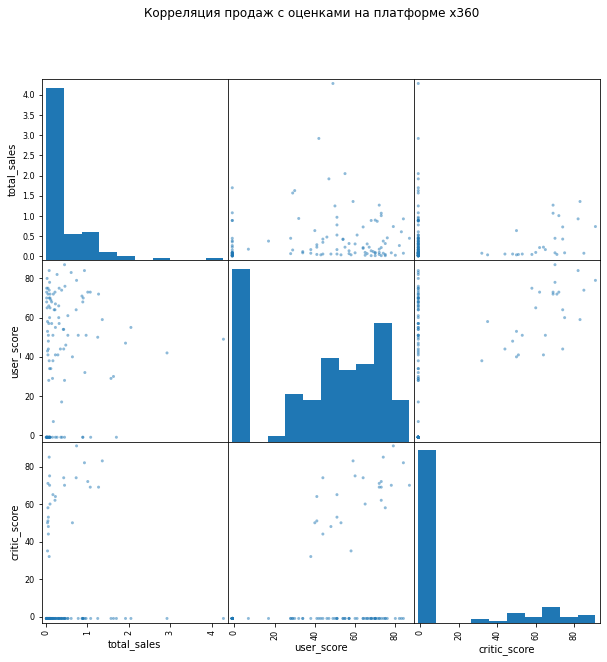

,total_sales,user_score,critic_score
total_sales,1.000000,0.072696,0.004012
user_score,0.072696,1.000000,0.375145
critic_score,0.004012,0.375145,1.000000


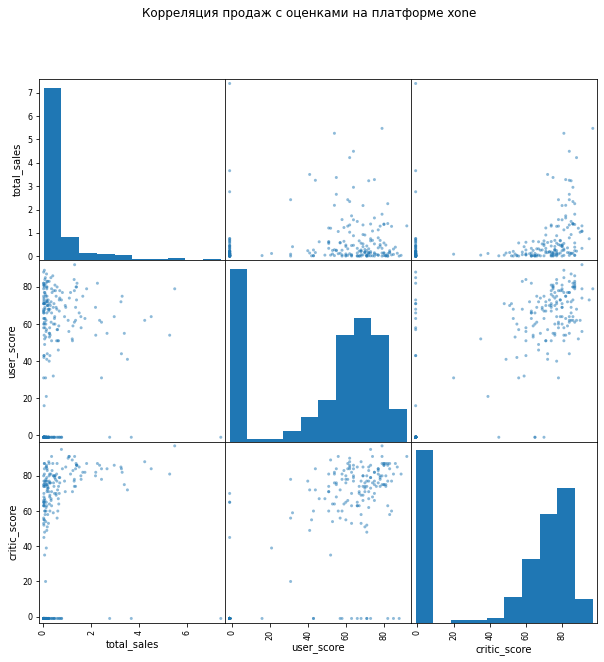

,total_sales,user_score,critic_score
total_sales,1.000000,0.102603,0.271476
user_score,0.102603,1.000000,0.794310
critic_score,0.271476,0.794310,1.000000


In [41]:
platform_list = ['3ds', 'ps3','wiiu', 'x360', 'xone']

for platform in platform_list:
    data_1 = actual_data.query('platform == @platform')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (10,10))
    pd.plotting.scatter_matrix(data_1, ax=ax)
    fig.suptitle(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()   
    
    display(actual_data.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))

Анализируя полученные данные с графиков можно прийти к выводу, что в целом ситуация с платформы PS4 распространяется и на другие платформы. \
Характер зависимости нелинейный

### Общее распределение игр по жанрам.

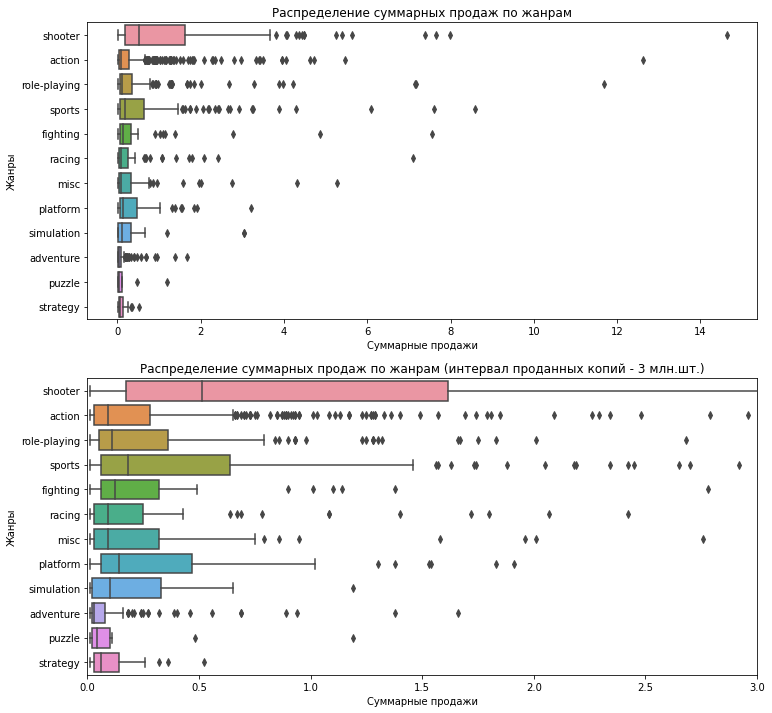

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12, 12)
sns.boxplot(y=actual_data.genre, x=actual_data.total_sales, ax=ax1)
ax1.set_xlabel('Суммарные продажи')
ax1.set_ylabel('Жанры')
ax1.set_title('Распределение суммарных продаж по жанрам')
sns.boxplot(y=actual_data.genre, x=actual_data.total_sales, ax=ax2)
ax2.set_xlim(0,3)
ax2.set_xlabel('Суммарные продажи')
ax2.set_ylabel('Жанры')
ax2.set_title('Распределение суммарных продаж по жанрам (интервал проданных копий - 3 млн.шт.)');

Можно сделать вывод, что **Shooter, Sport, Platform** - самые интересные жанры с точки зрения средней прибыльности . \
В жанре **action** показатели сильно разняться. Средняя прибыль там либо очень высокая,либо очень низкая (видим это по очеь большому размаху относительно усов. \
Наименьшее среднее в жанре **puzzle**.

## Составляем портрет пользователя каждого региона

### Топ-5 самых популярных платформ.

In [33]:
actual_data.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3ds,6.0%,47.5%,8.0%
pc,6.6%,0.0%,2.5%
ps3,9.4%,12.1%,7.8%
ps4,48.0%,16.1%,34.7%
psp,0.0%,0.4%,0.0%
psv,1.3%,15.6%,0.9%
wii,1.0%,0.0%,0.7%
wiiu,4.9%,7.9%,6.8%
x360,5.7%,0.1%,10.0%


<AxesSubplot:xlabel='platform'>

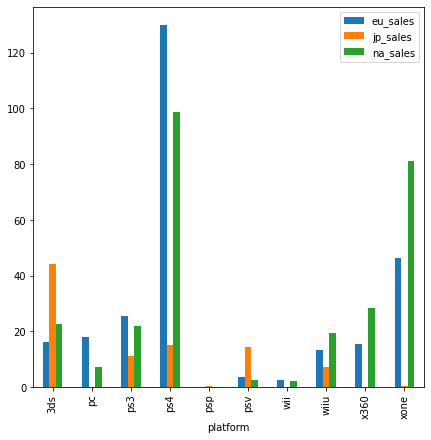

In [34]:
actual_data.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).plot(kind='bar', figsize=(7,7))

Европейские и североамериканские геймеры предпочитают ps4, 48% и 34,7% - соответственно. Японские геймеры голосуют за Nintendo 3DS(47,5%).

### Топ-5 жанров.

In [35]:
actual_data.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
action,27.6%,31.8%,25.5%
adventure,2.4%,3.9%,2.0%
fighting,2.5%,6.8%,4.4%
misc,4.8%,6.0%,5.3%
platform,2.5%,2.9%,2.4%
puzzle,0.2%,1.0%,0.2%
racing,5.2%,1.9%,3.1%
role-playing,10.4%,33.5%,11.8%
shooter,24.2%,5.2%,27.8%


<AxesSubplot:xlabel='genre'>

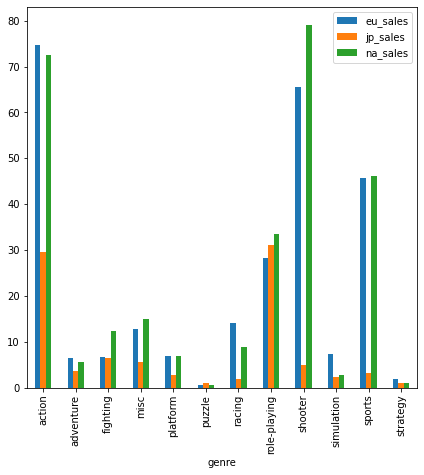

In [36]:
actual_data.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).plot(kind='bar', figsize=(7,7))

В Европе и северной Америке почти одинаково популярны жанры **action и shooter** (в Европе 27 и 24% соответственно. В Америке 25 и 27%). \
В Японии - **action и role-playing** 31 и 33 % соттветственно.

### Влияние рейтинга ESRB на продажи.

In [37]:
actual_data.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
e,21.4%,9.6%,17.9%
e10+,9.7%,4.8%,11.7%
m,34.5%,8.6%,33.9%
out of rating,21.8%,61.1%,22.8%
t,12.6%,15.9%,13.7%


<AxesSubplot:xlabel='rating'>

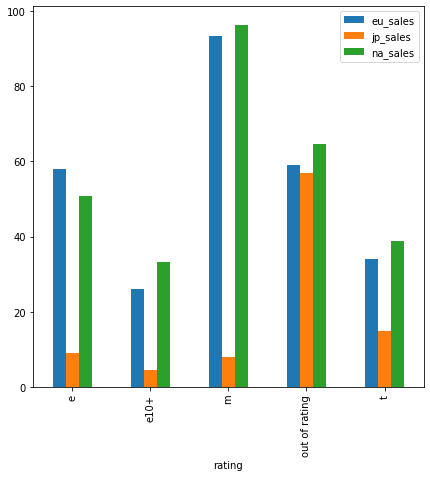

In [38]:
actual_data.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).plot(kind='bar', figsize=(7,7))

Первое, что бросается в глаза: больше половины игр японского рынка - без рейтинга. Скорее всего это связано с тем, что в Японии рейтингом занимается не ESBP, а SARO.\
В Европе и Америке большинство игр имеет рейтинг М-mature. Скорее всего это связано с популярностью жанров **action и shooter** в которых присутствует насилие.

<div class="alert alert-info">
<b>Специально не вводил лишние переменные, так как они нам дальше не понадобятся. Строил графики сразу после аггрегации. Бритва Оккама в действии</b> 
</div>

## Проверка гипотез

### Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Будем рассматривать гипотезу:\
𝐻0={Средние пользовательские рейтинги на платформах XBox One и PC равны}\
Тогда:\
𝐻1={Средние пользовательские рейтинги на платформах XBox One и PC НЕ равны}

Установим уровень статистической значимости  𝛼=0.05.\
Такой уровень является стандартным и наша задача слегкостью выдержит такой уровень точности.\
Генеральные Совокупности игроков на разных платформах не зависят друг от друга. Значит можно применять t-test.\
Равенство дисперсий и размер выборок позволяет. Он у нас явно > 30.

Так как на стадии предобратотки мы добавляли строковые значения в столбце и рейтингами, сначала удалим строки

In [39]:
xone = actual_data.query('platform == "xone"').user_score.dropna().reset_index(drop=True)
xone = xone.astype('int')
pc = actual_data.query('platform == "pc"').user_score.dropna().reset_index(drop=True)
pc = pc.astype('int')
alpha = .05

results = st.stats.ttest_ind(xone, pc, equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.31298852461234045
Не получилось отвергнуть нулевую гипотезу


Так как нулевую гипотезу отвергнуть не удалось то согласно тесту мы НЕ можем утверждать, что средние пользовательские рейтинги на платформах Xbox One и PC отличаются.

### Пользовательские рейтинги жанров Action и Sports равны.

Будем рассматривать гипотезу: \
𝐻0={Средние пользовательские рейтинги жанров Action и Sports равны.}\
Тогда:\
𝐻1={Средние пользовательские рейтинги жанров Action и Sports НЕ равны}

In [40]:
action = actual_data.query('genre == "action"').user_score.dropna().reset_index(drop=True)
action = action.astype('int')
sports = actual_data.query('genre == "sports"').user_score.dropna().reset_index(drop=True)
sports = sports.astype('int')
alpha = .05

results = st.stats.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0005042389385397203
Отвергаем нулевую гипотезу


Так как мы отвергаем нулевую гипотезу, то согласно тесту средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

### В результате выполненного исследования, можем прийти к следующим выводам.
- Рынок игр зародился в далеком 1980 году, но бурно развиваться начал только с 1995 года.
- После 2011 года произошел спад (возможно насыщение) рынка.
- Самыми перспективными платформами оказались: Sony PlayStation 4 и Xbox One от Microsoft.
- На момент исследования рынок всех платформ падает.
- Актуальный период исследования для такой динамичной сферы 2-3 года. Все данные дата-сета нам не понадобились.
- Рынок консолей живет по своим правилам, отличающимся от ПК-гейминга.
- Можно сделать вывод, что Shooter, Sport, Platform - самые интересные жанры с точки зрения средней прибыльности.
- Наименьшая средняя прибыль в жанре puzzle.
- В Европе и северной Америке почти одинаково популярны жанры action и shooter (в Европе 27 и 24% соответственно. В Америке 25 и 27%). В Японии - action и role-playing 31 и 33 % соттветственно.
- Больше половины игр японского рынка - без рейтинга. Скорее всего это связано с тем, что в Японии рейтингом занимается не ESBP, а SARO.
- В Европе и Америке большинство игр имеет рейтинг М-mature. Скорее всего это связано с популярностью жанров action и shooter в которых присутствует насилие.
- Согласно t-тесту мы НЕ можем утверждать, что средние пользовательские рейтинги на платформах Xbox One и PC отличаются.
- Cогласно t-тесту средние пользовательские рейтинги жанров Action и Sports отличаются.

Отдельно хочу отметить то, что при выполнении проекта немного сказывался дефицит времени. В связи с чем прошу простить мне легкую сумбурность и не лучшего качества оформление во второй половине проекта ))